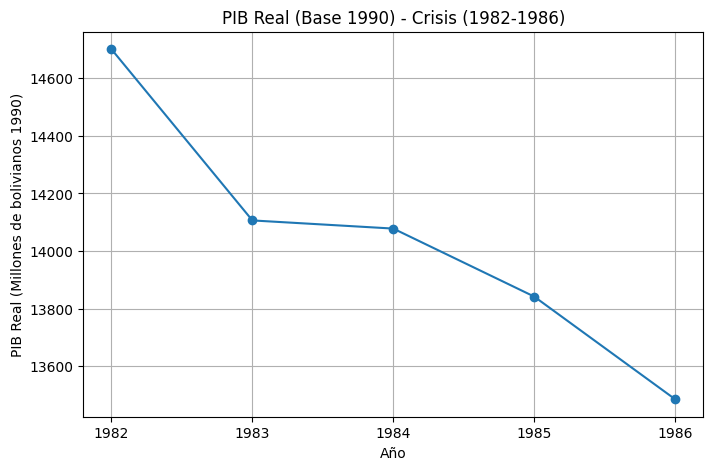

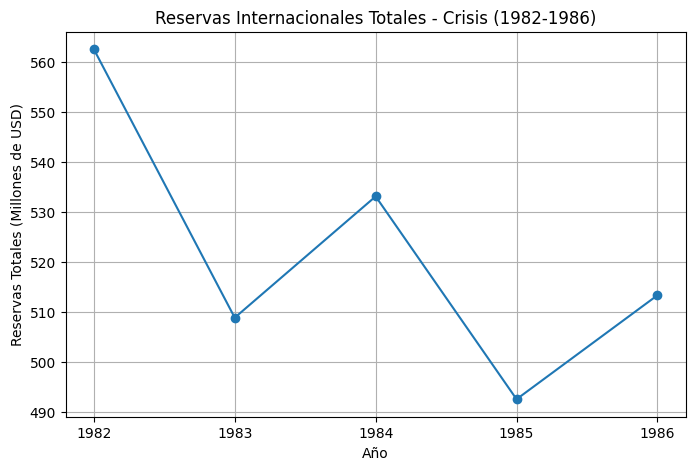

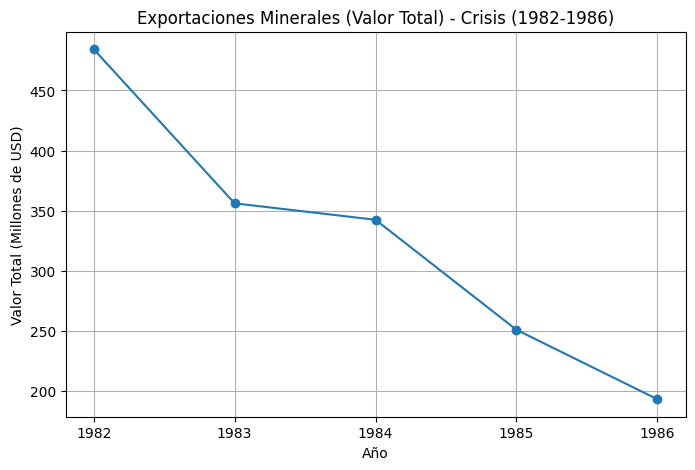

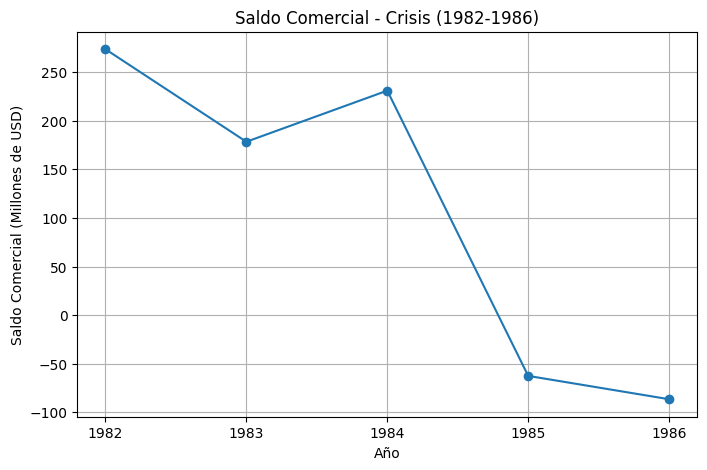

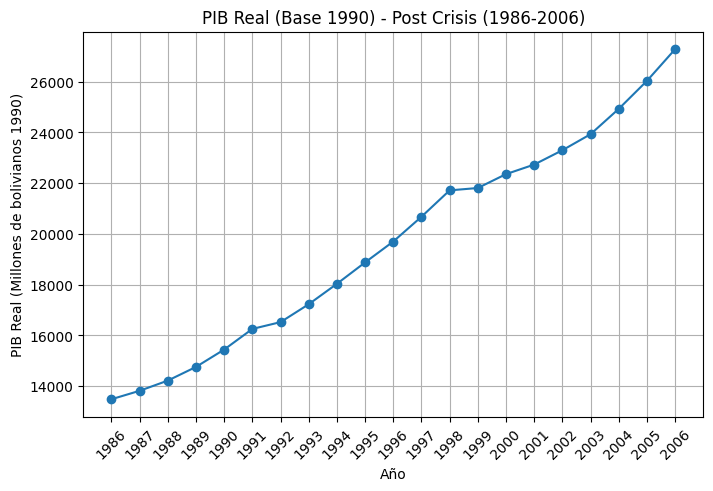

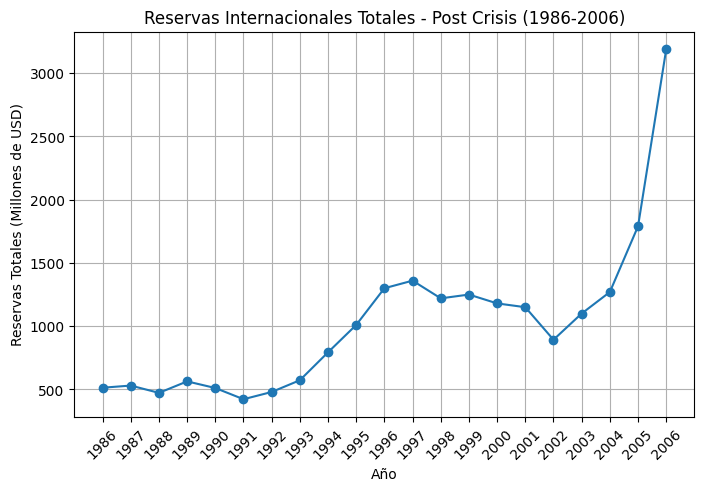

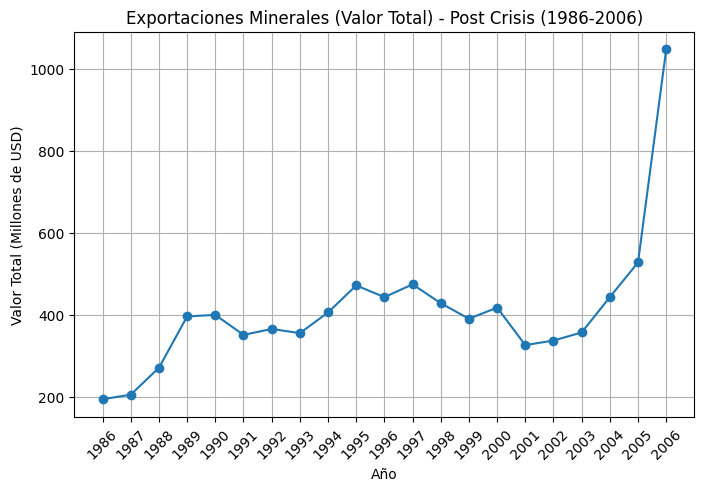

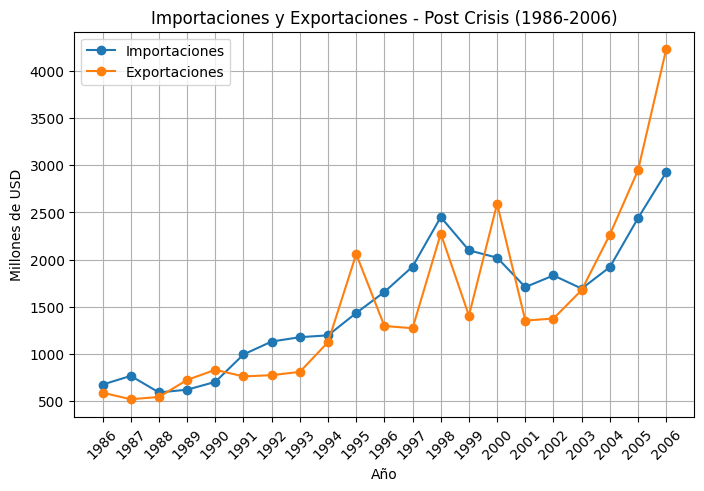

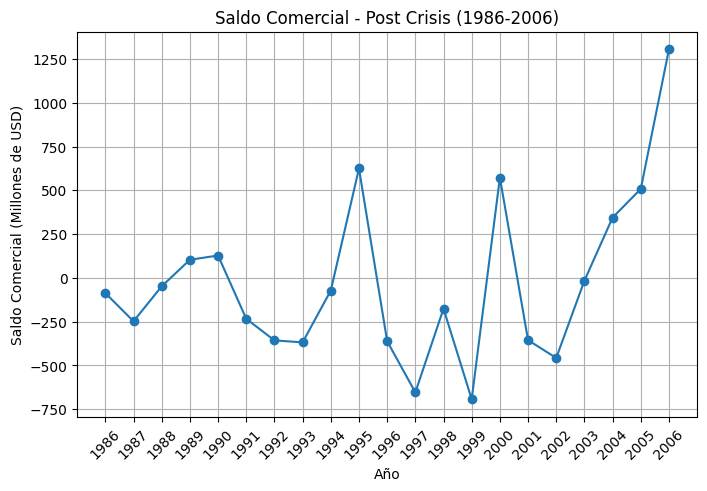

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Conectar a la base de datos y cargar los datos
conn = sqlite3.connect('../../db/proyectomacro.db')
df_pib = pd.read_sql_query("SELECT * FROM pib_real_gasto", conn)
df_minerales = pd.read_sql_query("SELECT * FROM exportaciones_minerales_totales", conn)
df_balanza_comercial = pd.read_sql_query("SELECT * FROM balanza_comercial", conn)
df_grado_de_apertura = pd.read_sql_query("SELECT * FROM grado_de_apertura", conn)
df_participacion_x_m_pib = pd.read_sql_query("SELECT * FROM participacion_x_m_pib", conn)
df_reservas_internacionales = pd.read_sql_query("SELECT * FROM Reservas_oro_divisas", conn)
df_tasa_de_crecimiento = pd.read_sql_query("SELECT * FROM Tasa_Crecimiento_PIB", conn)
df_precios_minerales = pd.read_sql_query("SELECT * FROM precio_oficial_minerales", conn)
conn.close()

# Establecer el índice como 'año' (y convertir a entero)
for df in [df_pib, df_minerales, df_balanza_comercial, df_reservas_internacionales, df_precios_minerales]:
    df.set_index('año', inplace=True)
    df.index = df.index.astype(int)

# Ajustar unidades:
df_pib = df_pib / 1000  # de miles a millones de bolivianos (base 1990)
df_reservas_internacionales = df_reservas_internacionales / 1000000  # de USD a millones

# Definir periodos para el análisis:
# Periodo de crisis: 1982 a 1986
# Periodo post crisis: 1986 a 2006
crisis_start, crisis_end = 1982, 1986
post_crisis_start, post_crisis_end = 1986, 2006

# Filtrar datos para el PIB
df_pib_crisis = df_pib.loc[crisis_start:crisis_end]
df_pib_post_crisis = df_pib.loc[post_crisis_start:post_crisis_end]

# Filtrar datos para las Reservas Internacionales
df_reservas_crisis = df_reservas_internacionales.loc[crisis_start:crisis_end]
df_reservas_post_crisis = df_reservas_internacionales.loc[post_crisis_start:post_crisis_end]

# Calcular 'valor_total' para exportaciones minerales
valor_columns = ['estaño_valor', 'plomo_valor', 'zinc_valor', 'plata_valor', 
                 'wolfram_valor', 'cobre_valor', 'antimonio_valor', 'oro_valor']
df_minerales['valor_total'] = df_minerales[valor_columns].sum(axis=1)
df_minerales['valor_total'] = df_minerales['valor_total'] / 1000  # convertir de miles a millones de USD

df_minerales_crisis = df_minerales.loc[crisis_start:crisis_end]
df_minerales_post_crisis = df_minerales.loc[post_crisis_start:post_crisis_end]

# Filtrar datos de la Balanza Comercial
df_balanza_comercial_crisis = df_balanza_comercial.loc[crisis_start:crisis_end]
df_balanza_comercial_post_crisis = df_balanza_comercial.loc[post_crisis_start:post_crisis_end]

# Filtrar datos para el periodo de crisis y para el periodo post crisis
df_precios_crisis = df_precios_minerales.loc[crisis_start:crisis_end]
df_precios_post_crisis = df_precios_minerales.loc[post_crisis_start:post_crisis_end]
# ------------------------------
# Gráficas para el periodo de CRISIS (1982-1986)
# ------------------------------
# 1. PIB Real
plt.figure(figsize=(8,5))
plt.plot(df_pib_crisis.index, df_pib_crisis['pib_real_base_1990'], marker='o', linestyle='-')
plt.title('PIB Real (Base 1990) - Crisis (1982-1986)')
plt.xlabel('Año')
plt.ylabel('PIB Real (Millones de bolivianos 1990)')
plt.grid(True)
plt.xticks(df_pib_crisis.index)
plt.show()

# 2. Reservas Internacionales Totales
plt.figure(figsize=(8,5))
plt.plot(df_reservas_crisis.index, df_reservas_crisis['reservas_totales'], marker='o', linestyle='-')
plt.title('Reservas Internacionales Totales - Crisis (1982-1986)')
plt.xlabel('Año')
plt.ylabel('Reservas Totales (Millones de USD)')
plt.grid(True)
plt.xticks(df_reservas_crisis.index)
plt.show()

# 3. Exportaciones Minerales (Valor Total)
plt.figure(figsize=(8,5))
plt.plot(df_minerales_crisis.index, df_minerales_crisis['valor_total'], marker='o', linestyle='-')
plt.title('Exportaciones Minerales (Valor Total) - Crisis (1982-1986)')
plt.xlabel('Año')
plt.ylabel('Valor Total (Millones de USD)')
plt.grid(True)
plt.xticks(df_minerales_crisis.index)
plt.show()

# 4. Saldo Comercial
plt.figure(figsize=(8,5))
plt.plot(df_balanza_comercial_crisis.index, df_balanza_comercial_crisis['saldo_comercial'], marker='o', linestyle='-')
plt.title('Saldo Comercial - Crisis (1982-1986)')
plt.xlabel('Año')
plt.ylabel('Saldo Comercial (Millones de USD)')
plt.grid(True)
plt.xticks(df_balanza_comercial_crisis.index)
plt.show()

# ------------------------------
# Gráficas para el periodo POST CRISIS (1986-2006)
# ------------------------------
# 1. PIB Real
plt.figure(figsize=(8,5))
plt.plot(df_pib_post_crisis.index, df_pib_post_crisis['pib_real_base_1990'], marker='o', linestyle='-')
plt.title('PIB Real (Base 1990) - Post Crisis (1986-2006)')
plt.xlabel('Año')
plt.ylabel('PIB Real (Millones de bolivianos 1990)')
plt.grid(True)
plt.xticks(df_pib_post_crisis.index, rotation=45)
plt.show()

# 2. Reservas Internacionales Totales
plt.figure(figsize=(8,5))
plt.plot(df_reservas_post_crisis.index, df_reservas_post_crisis['reservas_totales'], marker='o', linestyle='-')
plt.title('Reservas Internacionales Totales - Post Crisis (1986-2006)')
plt.xlabel('Año')
plt.ylabel('Reservas Totales (Millones de USD)')
plt.grid(True)
plt.xticks(df_reservas_post_crisis.index, rotation=45)
plt.show()

# 3. Exportaciones Minerales (Valor Total)
plt.figure(figsize=(8,5))
plt.plot(df_minerales_post_crisis.index, df_minerales_post_crisis['valor_total'], marker='o', linestyle='-')
plt.title('Exportaciones Minerales (Valor Total) - Post Crisis (1986-2006)')
plt.xlabel('Año')
plt.ylabel('Valor Total (Millones de USD)')
plt.grid(True)
plt.xticks(df_minerales_post_crisis.index, rotation=45)
plt.show()

# 4. Balanza Comercial: Importaciones y Exportaciones
plt.figure(figsize=(8,5))
plt.plot(df_balanza_comercial_post_crisis.index, df_balanza_comercial_post_crisis['importaciones'], 
         marker='o', linestyle='-', label="Importaciones")
plt.plot(df_balanza_comercial_post_crisis.index, df_balanza_comercial_post_crisis['exportaciones'], 
         marker='o', linestyle='-', label="Exportaciones")
plt.title('Importaciones y Exportaciones - Post Crisis (1986-2006)')
plt.xlabel('Año')
plt.ylabel('Millones de USD')
plt.legend()
plt.grid(True)
plt.xticks(df_balanza_comercial_post_crisis.index, rotation=45)
plt.show()

# 5. Saldo Comercial
plt.figure(figsize=(8,5))
plt.plot(df_balanza_comercial_post_crisis.index, df_balanza_comercial_post_crisis['saldo_comercial'], 
         marker='o', linestyle='-')
plt.title('Saldo Comercial - Post Crisis (1986-2006)')
plt.xlabel('Año')
plt.ylabel('Saldo Comercial (Millones de USD)')
plt.grid(True)
plt.xticks(df_balanza_comercial_post_crisis.index, rotation=45)
plt.show()

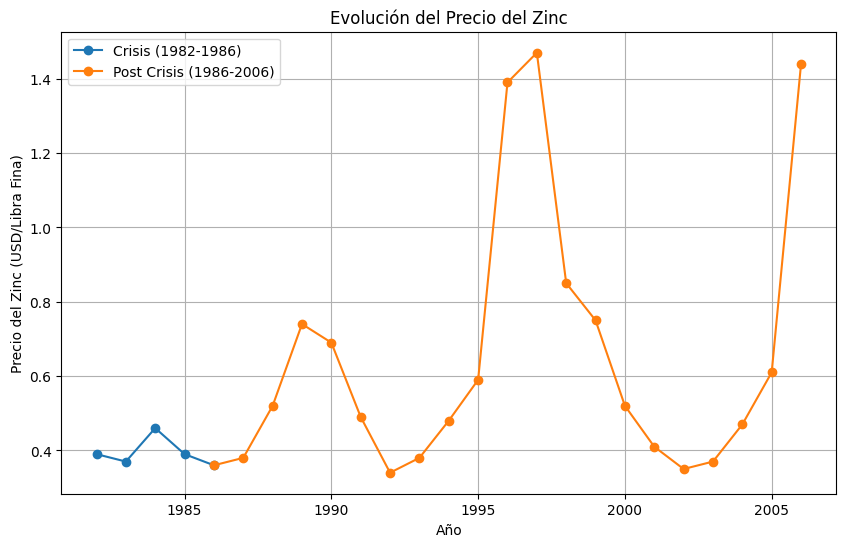

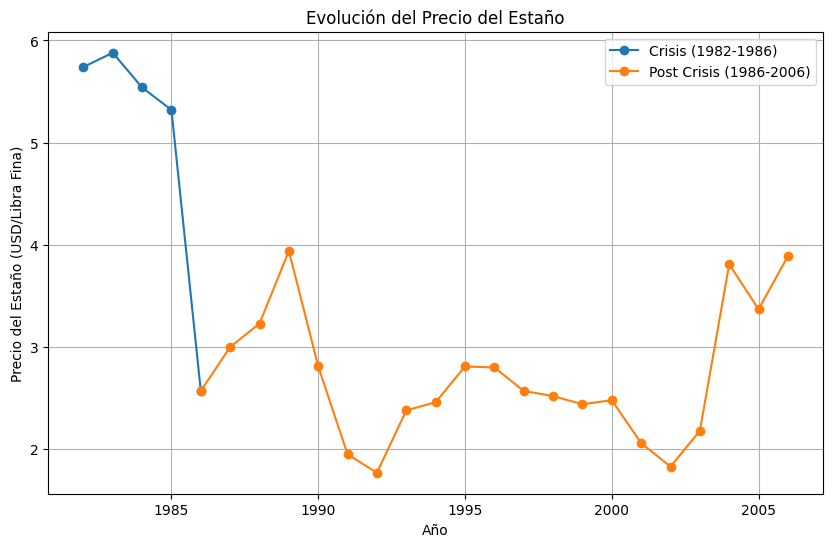

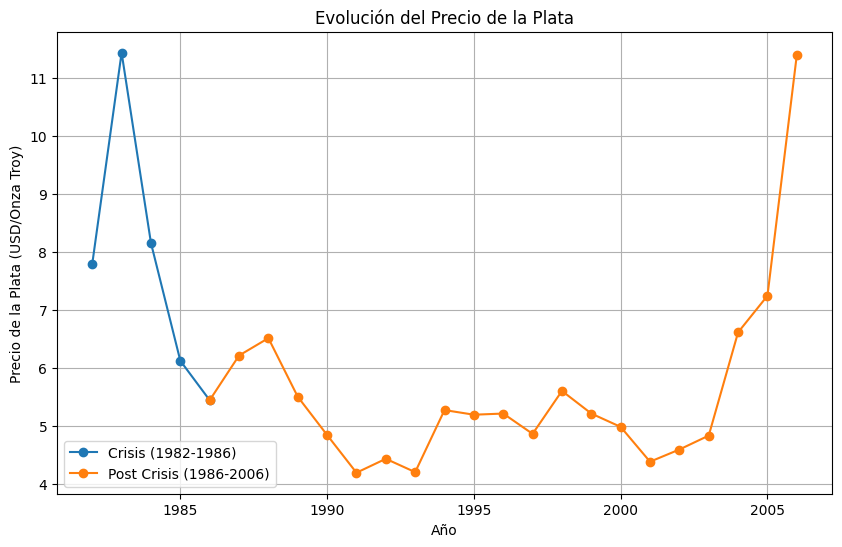

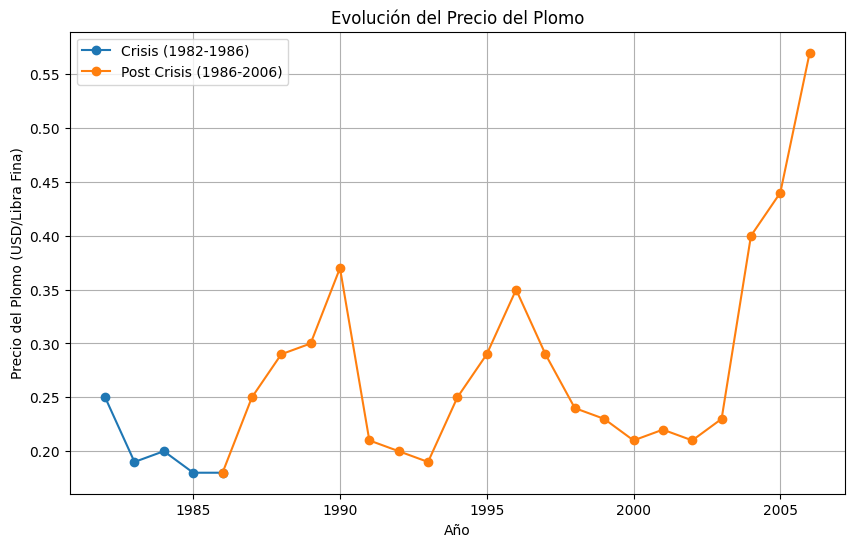

In [2]:
# --- Gráficas de Precios de Minerales ---
# Precio del Zinc
plt.figure(figsize=(10,6))
plt.plot(df_precios_crisis.index, df_precios_crisis['zinc'], label='Crisis (1982-1986)', marker='o')
plt.plot(df_precios_post_crisis.index, df_precios_post_crisis['zinc'], label='Post Crisis (1986-2006)', marker='o')
plt.title("Evolución del Precio del Zinc")
plt.xlabel("Año")
plt.ylabel("Precio del Zinc (USD/Libra Fina)")
plt.legend()
plt.grid(True)
plt.show()

# Precio del Estaño
plt.figure(figsize=(10,6))
plt.plot(df_precios_crisis.index, df_precios_crisis['estaño'], label='Crisis (1982-1986)', marker='o')
plt.plot(df_precios_post_crisis.index, df_precios_post_crisis['estaño'], label='Post Crisis (1986-2006)', marker='o')
plt.title("Evolución del Precio del Estaño")
plt.xlabel("Año")
plt.ylabel("Precio del Estaño (USD/Libra Fina)")
plt.legend()
plt.grid(True)
plt.show()

# Precio de la Plata
plt.figure(figsize=(10,6))
plt.plot(df_precios_crisis.index, df_precios_crisis['plata'], label='Crisis (1982-1986)', marker='o')
plt.plot(df_precios_post_crisis.index, df_precios_post_crisis['plata'], label='Post Crisis (1986-2006)', marker='o')
plt.title("Evolución del Precio de la Plata")
plt.xlabel("Año")
plt.ylabel("Precio de la Plata (USD/Onza Troy)")
plt.legend()
plt.grid(True)
plt.show()

# Precio del Plomo
plt.figure(figsize=(10,6))
plt.plot(df_precios_crisis.index, df_precios_crisis['plomo'], label='Crisis (1982-1986)', marker='o')
plt.plot(df_precios_post_crisis.index, df_precios_post_crisis['plomo'], label='Post Crisis (1986-2006)', marker='o')
plt.title("Evolución del Precio del Plomo")
plt.xlabel("Año")
plt.ylabel("Precio del Plomo (USD/Libra Fina)")
plt.legend()
plt.grid(True)
plt.show()

In [3]:
# Crear diccionario para guardar los resultados
comparacion = {}

# --- PIB Real ---
pib_pre = df_pib_crisis['pib_real_base_1990']
pib_post = df_pib_post_crisis['pib_real_base_1990']

comparacion['PIB Real'] = {
    'media_pre': pib_pre.mean(),
    'media_post': pib_post.mean(),
    'std_pre': pib_pre.std(),
    'std_post': pib_post.std(),
    'min_pre': pib_pre.min(),
    'min_post': pib_post.min(),
    'max_pre': pib_pre.max(),
    'max_post': pib_post.max(),
    'cv_pre': pib_pre.std() / pib_pre.mean(),
    'cv_post': pib_post.std() / pib_post.mean()
}

# --- Reservas Internacionales ---
res_pre = df_reservas_crisis['reservas_totales']
res_post = df_reservas_post_crisis['reservas_totales']

comparacion['Reservas'] = {
    'media_pre': res_pre.mean(),
    'media_post': res_post.mean(),
    'std_pre': res_pre.std(),
    'std_post': res_post.std(),
    'min_pre': res_pre.min(),
    'min_post': res_post.min(),
    'max_pre': res_pre.max(),
    'max_post': res_post.max(),
    'cv_pre': res_pre.std() / res_pre.mean(),
    'cv_post': res_post.std() / res_post.mean()
}

# --- Exportaciones Minerales (Mill USD) ---
exp_pre = df_minerales_crisis['valor_total']  # ya convertido a millones de USD
exp_post = df_minerales_post_crisis['valor_total'] 

comparacion['Exportaciones Minerales (Mill USD)'] = {
    'media_pre': exp_pre.mean(),
    'media_post': exp_post.mean(),
    'std_pre': exp_pre.std(),
    'std_post': exp_post.std(),
    'min_pre': exp_pre.min(),
    'min_post': exp_post.min(),
    'max_pre': exp_pre.max(),
    'max_post': exp_post.max(),
    'cv_pre': exp_pre.std() / exp_pre.mean(),
    'cv_post': exp_post.std() / exp_post.mean()
}

# --- Precios de los Minerales ---
# Precio del Zinc
p_zinc_pre = df_precios_crisis['zinc']
p_zinc_post = df_precios_post_crisis['zinc']
comparacion['Precio Zinc'] = {
    'media_pre': p_zinc_pre.mean(),
    'media_post': p_zinc_post.mean(),
    'std_pre': p_zinc_pre.std(),
    'std_post': p_zinc_post.std(),
    'min_pre': p_zinc_pre.min(),
    'min_post': p_zinc_post.min(),
    'max_pre': p_zinc_pre.max(),
    'max_post': p_zinc_post.max(),
    'cv_pre': p_zinc_pre.std() / p_zinc_pre.mean(),
    'cv_post': p_zinc_post.std() / p_zinc_post.mean()
}

# Precio del Estaño
p_estaño_pre = df_precios_crisis['estaño']
p_estaño_post = df_precios_post_crisis['estaño']
comparacion['Precio Estaño'] = {
    'media_pre': p_estaño_pre.mean(),
    'media_post': p_estaño_post.mean(),
    'std_pre': p_estaño_pre.std(),
    'std_post': p_estaño_post.std(),
    'min_pre': p_estaño_pre.min(),
    'min_post': p_estaño_post.min(),
    'max_pre': p_estaño_pre.max(),
    'max_post': p_estaño_post.max(),
    'cv_pre': p_estaño_pre.std() / p_estaño_pre.mean(),
    'cv_post': p_estaño_post.std() / p_estaño_post.mean()
}

# Precio de la Plata
p_plata_pre = df_precios_crisis['plata']
p_plata_post = df_precios_post_crisis['plata']
comparacion['Precio Plata'] = {
    'media_pre': p_plata_pre.mean(),
    'media_post': p_plata_post.mean(),
    'std_pre': p_plata_pre.std(),
    'std_post': p_plata_post.std(),
    'min_pre': p_plata_pre.min(),
    'min_post': p_plata_post.min(),
    'max_pre': p_plata_pre.max(),
    'max_post': p_plata_post.max(),
    'cv_pre': p_plata_pre.std() / p_plata_pre.mean(),
    'cv_post': p_plata_post.std() / p_plata_post.mean()
}

# Precio del Plomo
p_plomo_pre = df_precios_crisis['plomo']
p_plomo_post = df_precios_post_crisis['plomo']
comparacion['Precio Plomo'] = {
    'media_pre': p_plomo_pre.mean(),
    'media_post': p_plomo_post.mean(),
    'std_pre': p_plomo_pre.std(),
    'std_post': p_plomo_post.std(),
    'min_pre': p_plomo_pre.min(),
    'min_post': p_plomo_post.min(),
    'max_pre': p_plomo_pre.max(),
    'max_post': p_plomo_post.max(),
    'cv_pre': p_plomo_pre.std() / p_plomo_pre.mean(),
    'cv_post': p_plomo_post.std() / p_plomo_post.mean()
}

# Convertir el diccionario a DataFrame para visualizar la tabla comparativa
df_comparacion = pd.DataFrame(comparacion).T.round(2)
df_comparacion

,media_pre,media_post,std_pre,std_post,min_pre,min_post,max_pre,max_post,cv_pre,cv_post
PIB Real,14042.52,19671.61,443.99,4234.76,13485.74,13485.74,14700.53,27278.91,0.03,0.22
Reservas,522.06,1027.19,26.88,627.70,492.49,422.36,562.57,3190.00,0.05,0.61
Exportaciones Minerales (Mill USD),325.52,409.76,111.12,168.24,193.47,193.47,484.23,1049.18,0.34,0.41
Precio Zinc,0.39,0.65,0.04,0.36,0.36,0.34,0.46,1.47,0.10,0.55
Precio Estaño,5.01,2.71,1.38,0.64,2.57,1.77,5.88,3.94,0.28,0.24
Precio Plata,7.79,5.56,2.33,1.56,5.44,4.19,11.43,11.39,0.30,0.28
Precio Plomo,0.20,0.28,0.03,0.10,0.18,0.18,0.25,0.57,0.15,0.34
